---

# <center> ★ AI / ML Project - Credit Card Fraud Detection ★
#### <center> ***Domain: Finance***

---

<img src="credit_card.jpeg" style="width: 700px;"/>

---

### Description:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Acknowledgements:
This dataset has been referred from Kaggle: \
https://www.kaggle.com/mlg-ulb/creditcardfraud

### Objective:
- Understand the Dataset & cleanup (if required).
- Build classification model to predict weather the the transaction is fraudulent or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [95]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import CondensedNearestNeighbour
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [61]:
#Importing the dataset

df = pd.read_csv('creditcard.csv')
#df.drop(['ID','year'],axis=1, inplace=True)

target = 'Class'
labels = ['Non - Fraudulent','Fraudulent']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Inference: The Datset consists of 31 features & 284807 samples.


In [48]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Class          2
Amount     32767
Time      124592
V3        275663
V28       275663
V27       275663
V26       275663
V25       275663
V24       275663
V23       275663
V22       275663
V21       275663
V20       275663
V19       275663
V18       275663
V17       275663
V16       275663
V1        275663
V14       275663
V13       275663
V12       275663
V11       275663
V10       275663
V9        275663
V8        275663
V7        275663
V6        275663
V5        275663
V4        275663
V2        275663
V15       275663
dtype: int64

In [50]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 30 numerical & 0 categorical features.


In [51]:
#Checking the stats of all the columns

display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


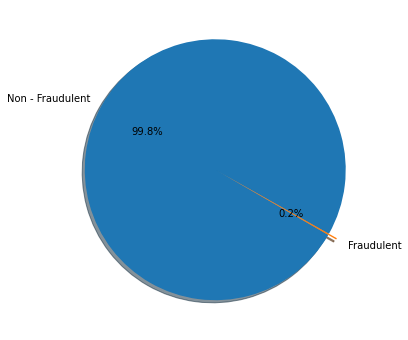

In [8]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.07
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=-30)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

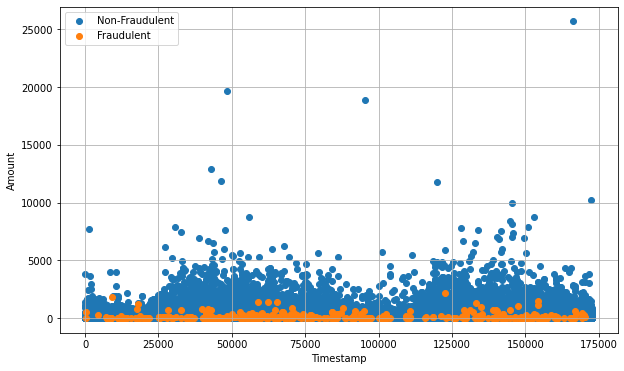

In [45]:
#Visualising the Fraudulent Transactions for various amounts across timstamps

plt.scatter(df[df.Class==0]['Time'], df[df.Class==0]['Amount'], label='Non-Fraudulent')
plt.scatter(df[df.Class==1]['Time'], df[df.Class==1]['Amount'], label='Fraudulent')
plt.xlabel('Timestamp')
plt.ylabel('Amount')
plt.grid()
plt.legend()
plt.show()

In [9]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=4
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=15:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    #else:
    #    plt.subplot(2,2,i)
    #    sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

                               Visualising Categorical Features:                                


<Figure size 1080x0 with 0 Axes>

**Inference:** Visualizing the categorical features reveal lot of information about the dataset.

                                     Features Distribution                                      


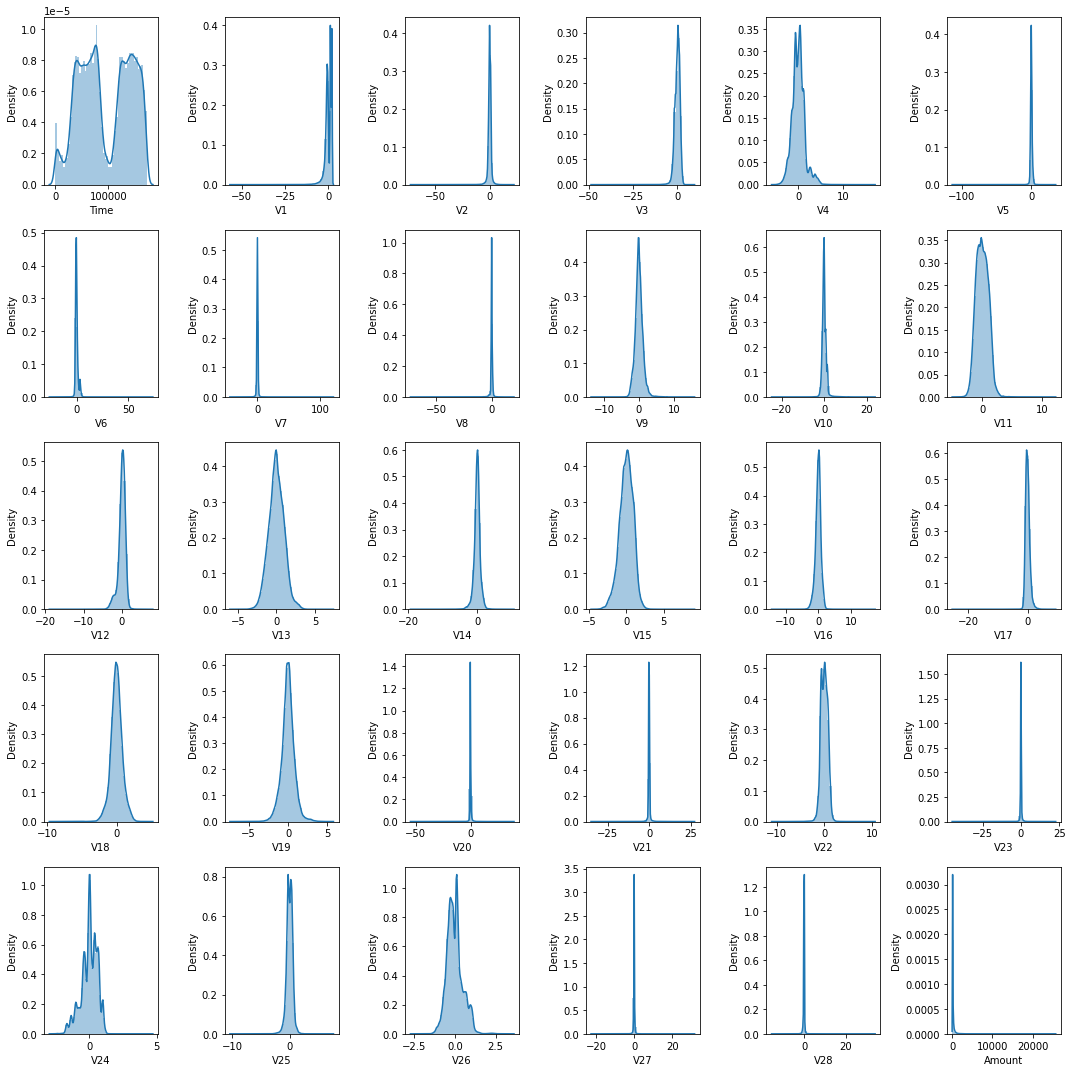

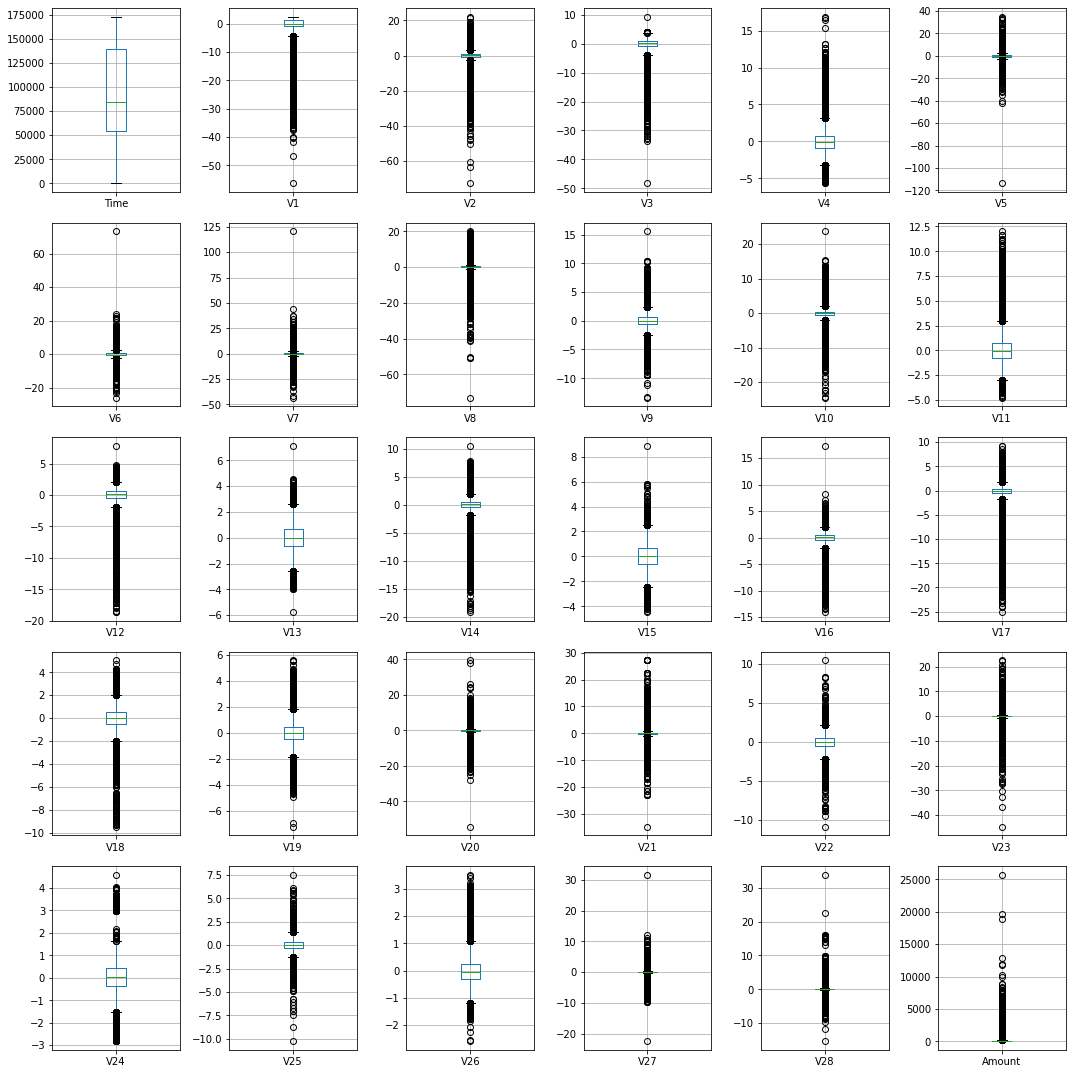

In [11]:
#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Inference:** The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers..

In [ ]:
#Understanding the relationship between all the features

# ppc=[i for i in df1.columns if i not in cf]
# g=sns.pairplot(df1[ppc], hue=target, size=4)
# #g.map_upper(sns.kdeplot, levels=1, color=".2")
# plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem
to have lot of overlap for the outcome classes, making it difficult to be distingusihable. 
Let is proceed to perform cleanup on the data to remove the irregularities...

---

## <center> 3. Data Preprocessing

In [52]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

        Total Null Values  Percentage
Time                    0         0.0
V28                     0         0.0
V27                     0         0.0
V26                     0         0.0
V25                     0         0.0
V24                     0         0.0
V23                     0         0.0
V22                     0         0.0
V21                     0         0.0
V20                     0         0.0
V19                     0         0.0
V18                     0         0.0
V17                     0         0.0
V16                     0         0.0
Amount                  0         0.0
V15                     0         0.0
V13                     0         0.0
V12                     0         0.0
V11                     0         0.0
V10                     0         0.0
V9                      0         0.0
V8                      0         0.0
V7                      0         0.0
V6                      0         0.0
V5                      0         0.0
V4          

In [62]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = original_df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 1081


In [54]:
#Converting categorical Columns to Numeric

df1 = df.copy()

#Target Variable
#MAP={}
#for i,e in enumerate(df1[target].unique()):
#    MAP[e]=i
#df1[target]=df1[target].map(MAP)
#print('Mapping Target variable --->',MAP)

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df1[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df1[i]=pd.get_dummies(df1[i], drop_first=True, prefix=str(i))
    if (df1[i].nunique()>2 and df1[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df1 = pd.concat([df1.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df1[i], drop_first=True, prefix=str(i)))],axis=1)

In [90]:
#Removal of outlier:

df3 = df1.copy()

for i in [i for i in df3.columns]:
    if df3[i].nunique()>=12:
        Q1 = df3[i].quantile(0.0001)
        Q3 = df3[i].quantile(0.9999)
        IQR = Q3 - Q1
        df3 = df3[df3[i] <= (Q3+(1.5*IQR))]
        df3 = df3[df3[i] >= (Q1-(1.5*IQR))]
df3 = df3.reset_index(drop=True)
display(df3.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df3.shape[0]))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Inference: Before removal of outliers, The dataset had 283726 samples.
Inference: After removal of outliers, The dataset now has 283722 samples.


In [91]:
df3.Class.value_counts()

0    283249
1       473
Name: Class, dtype: int64

In [92]:
#df3 = pd.concat([df3,df1[df1.Class==1]], axis=0)

In [126]:
#Fixing the imbalance using SMOTE Technique

df4 = df3.copy()

print('Original class distribution:')
print(df4[target].value_counts())

#xf = df4.columns
#X = df4.drop([target],axis=1)
#Y = df4[target]

#smote = SMOTE()
#undersample = OneSidedSelection(n_neighbors=10, n_seeds_S=200)
#X, Y = undersample.fit_resample(X, Y)

#df5 = pd.DataFrame(X, columns=xf)
#df5[target] = Y

df5_1 = df4[df4.Class==1]
df5_0 = df4[df4.Class==0]

df5_0=df5_0.loc[random.choices(df5_0.index.values,k=2000)]

df5 = pd.concat([df5_0,df5_1],axis=0)

print('\nClass distribution after applying SMOTE Technique:',)
print(df5[target].value_counts())

Original class distribution:
0    283249
1       473
Name: Class, dtype: int64

Class distribution after applying SMOTE Technique:
0    2000
1     473
Name: Class, dtype: int64


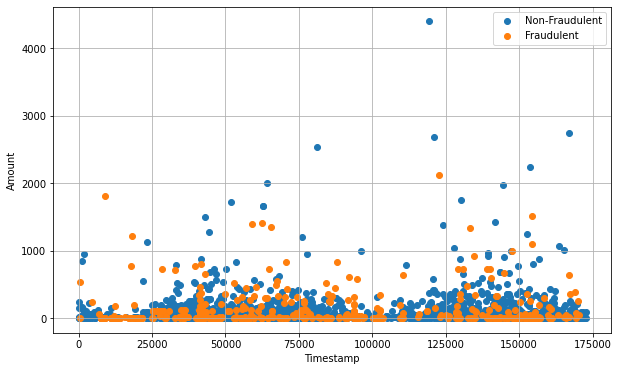

In [127]:
#Visualising the Fraudulent Transactions for various amounts across timstamps after undersampling

plt.scatter(df5[df5.Class==0]['Time'], df5[df5.Class==0]['Amount'], label='Non-Fraudulent')
plt.scatter(df5[df5.Class==1]['Time'], df5[df5.Class==1]['Amount'], label='Fraudulent')
plt.xlabel('Timestamp')
plt.ylabel('Amount')
plt.grid()
plt.legend()
plt.show()

ValueError: Wedge sizes 'x' must be non negative values

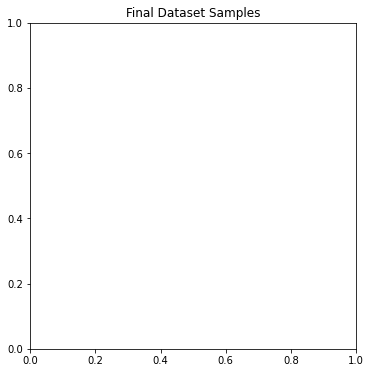

In [128]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df4.shape[0], df5.shape[0]-df4.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

---

## <center> 4. Data Manipulation

In [192]:
#Splitting the data intro training & testing sets

df = df5.copy()
df.reset_index(inplace=True, drop=True)

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (2473, 30) (2473,) 
Training set  --->  (1978, 30) (1978,) 
Testing set   --->  (495, 30)  (495,)


In [193]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1978.000000,1.978000e+03,...,1.978000e+03,1.978000e+03,1978.000000,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03
mean,-1.975726e-17,5.388342e-18,9.878628e-18,-8.980570e-19,2.649268e-17,-1.796114e-17,-1.616503e-17,1.975726e-17,0.000000,-6.286399e-18,...,1.436891e-17,8.980570e-18,0.000000,-3.592228e-18,-7.184456e-18,7.184456e-18,7.184456e-18,-4.490285e-18,-5.388342e-18,-2.873783e-17
std,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253,1.000253e+00,...,1.000253e+00,1.000253e+00,1.000253,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00
min,-1.955671e+00,-8.860013e+00,-1.131219e+01,-7.041970e+00,-2.113547e+00,-7.629816e+00,-4.130280e+00,-1.114102e+01,-15.494668,-7.278747e+00,...,-2.206631e+01,-1.664374e+01,-10.728007,-2.118336e+01,-3.560366e+00,-7.942519e+00,-3.352006e+00,-1.107638e+01,-9.048685e+00,-3.995131e-01
25%,-8.392189e-01,-1.485262e-01,-4.344259e-01,-9.605742e-02,-6.218203e-01,-1.355445e-01,-4.696173e-01,1.902503e-02,-0.139710,-3.277236e-01,...,-3.135946e-01,-2.031811e-01,-0.672889,-1.717494e-01,-6.227836e-01,-5.470556e-01,-6.640597e-01,-1.549180e-01,-1.560504e-01,-3.812802e-01
50%,-1.821673e-01,1.410716e-01,-1.565847e-01,2.557779e-01,-2.247422e-01,1.440505e-01,-8.014474e-02,2.276339e-01,-0.035900,1.640400e-01,...,-1.240889e-01,-3.552809e-02,0.010129,7.219082e-03,7.575379e-02,8.288099e-02,-1.008890e-01,-3.097913e-02,2.446006e-04,-3.081659e-01
75%,9.593395e-01,5.415574e-01,1.938246e-01,5.107294e-01,2.386357e-01,4.093413e-01,3.715122e-01,3.822693e-01,0.122499,5.451181e-01,...,1.563342e-01,1.536657e-01,0.638603,2.120308e-01,7.379465e-01,6.184138e-01,5.678058e-01,2.317808e-01,1.975525e-01,-4.007351e-02
max,1.670575e+00,8.392921e-01,8.117123e+00,1.092054e+00,4.527652e+00,4.137702e+00,4.528325e+00,3.698670e+00,7.469734,3.730464e+00,...,1.193736e+01,1.973190e+01,9.937553,6.939703e+00,2.463284e+00,3.971337e+00,5.807212e+00,4.580069e+00,3.319757e+01,1.744898e+01



                                Standardardization on Testing set                                


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,-0.041377,0.006225,-0.044821,-0.021183,0.022557,-0.014100,-0.025860,-0.017666,0.068341,0.005492,...,-0.000891,0.025093,-0.064664,0.026107,-0.040476,-0.008312,0.046901,0.018466,0.001529,-0.016214
std,1.013007,1.022915,1.029023,1.001339,0.989573,1.025622,0.985143,0.934701,1.035163,0.982989,...,0.883474,0.910073,0.962797,0.839859,1.079551,0.975629,1.014930,1.009433,0.833968,0.799254
min,-1.957834,-7.192250,-7.377809,-6.404716,-1.810556,-6.914685,-6.190299,-10.604606,-14.720932,-7.343352,...,-2.950926,-15.666064,-3.315494,-7.630119,-3.345795,-4.126803,-2.604188,-8.260032,-11.035431,-0.399513
25%,-0.934183,-0.102484,-0.468210,-0.150070,-0.570829,-0.170919,-0.424515,0.012210,-0.122658,-0.326148,...,-0.309114,-0.219974,-0.699609,-0.161760,-0.662386,-0.619570,-0.660978,-0.150824,-0.145242,-0.380651
50%,-0.208545,0.189682,-0.209423,0.267575,-0.189446,0.121056,-0.079426,0.211096,-0.018831,0.175552,...,-0.115173,-0.043012,-0.058537,0.026484,0.099046,0.016057,-0.033494,-0.024573,0.005441,-0.306521
75%,0.936694,0.545294,0.152138,0.474725,0.226165,0.378547,0.349140,0.361027,0.126119,0.534556,...,0.176644,0.146365,0.543237,0.233392,0.705049,0.606966,0.674313,0.208679,0.192573,0.006524
max,1.661461,0.824712,7.893044,1.002891,4.452659,4.345375,4.253911,2.387886,6.678456,3.493141,...,11.265541,6.245260,9.992463,6.035455,6.123988,3.332038,3.988144,5.280374,3.730343,8.662108


---

## <center> 5. Feature Selection/Extraction

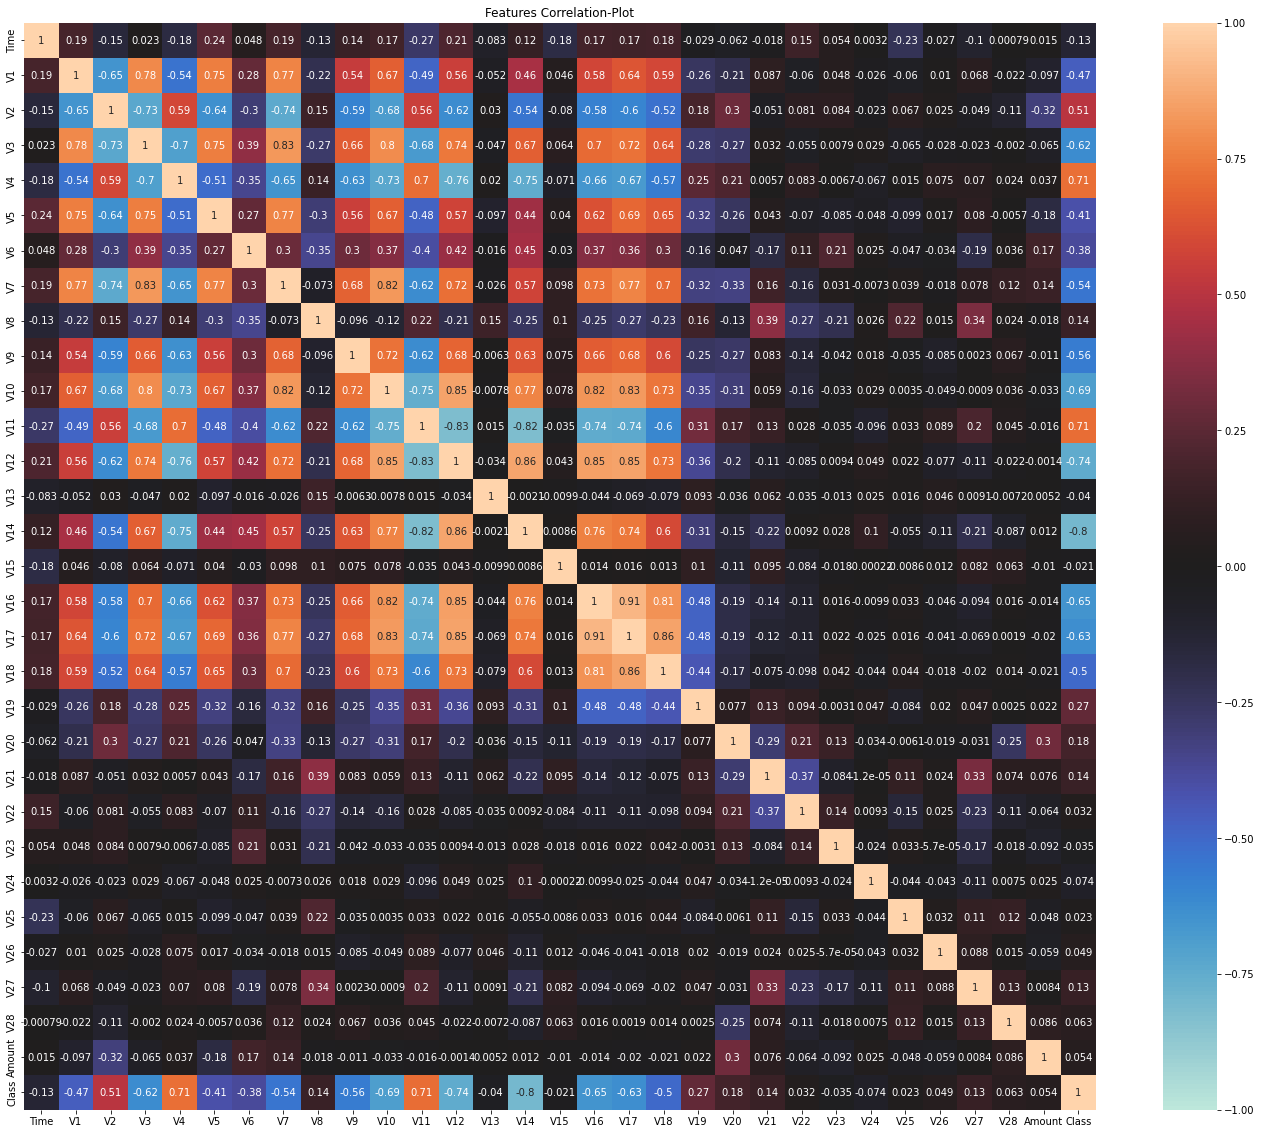

In [131]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[24,20])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

**Inference:** \
Correlation plt between the variables convey lot of information about the realationship betweem them. Especially in case of gender & survived.Hence it is clear that probably women were given more importance to save first. Similiary we have obvious strong correlation between fare & Passenger-Class. 

Let us check with different techniques if we can improve the model's performance by performing Feature Selection/Extraction steps to take care of these multi-collinearity...

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Decomposition Method - Principle Component Analysis (PCA)

## 5a. Manual Method - VIF

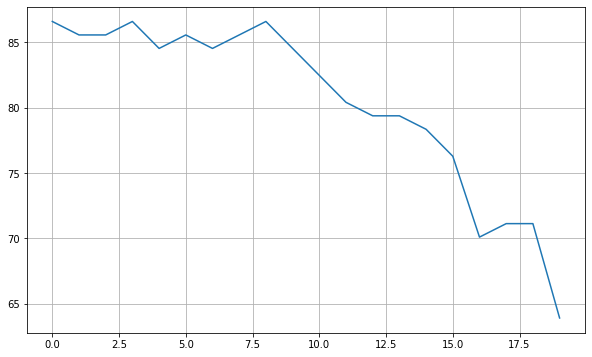

In [187]:
# Calculate the VIFs to remove multicollinearity

DROP=[]; scores=[]
#scores.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std)))

for i in range(len(X.columns.values)-10):
    vif = pd.DataFrame()
    Xs = X.drop(DROP,axis=1)
    #print(DROP)
    vif['Features'] = Xs.columns
    vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    DROP.append(vif.Features[0])
    if vif.VIF[0]>1.1:
        scores.append(recall_score(Test_Y,RandomForestClassifier().fit(Train_X_std.drop(DROP,axis=1), Train_Y).predict(Test_X_std.drop(DROP,axis=1)))*100)
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.7,0.85])
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

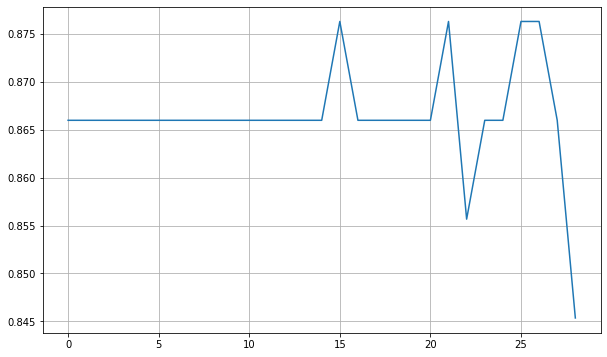

In [188]:
# Applying Recurrsive Feature Elimination

# Running RFE with the output number of the variable equal to 10
scores=[]

for i in range(29):
    LR = LogisticRegression(solver='liblinear')
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)   
    rfe = rfe.fit(Train_X_std, Train_Y)
    scores.append(recall_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]])))
    #print(scores)
    
plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

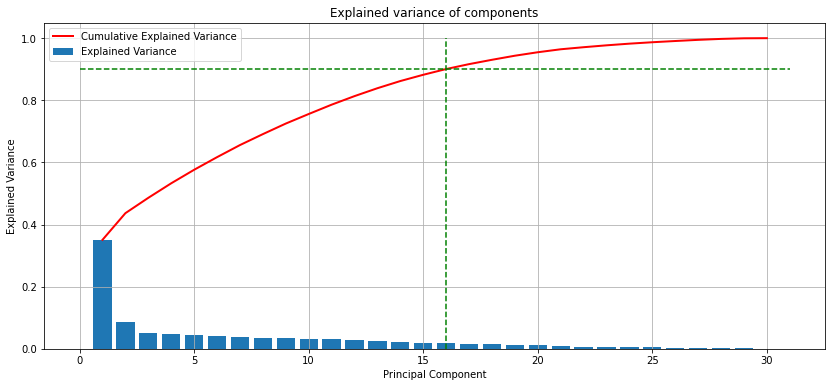

In [189]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(14,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.90,0.90],'g--')
plt.plot([16,16],[0,1], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.grid()
plt.legend()
plt.show()

**Inference:** We shall avoid performing dimensionality reduction for the current problem.

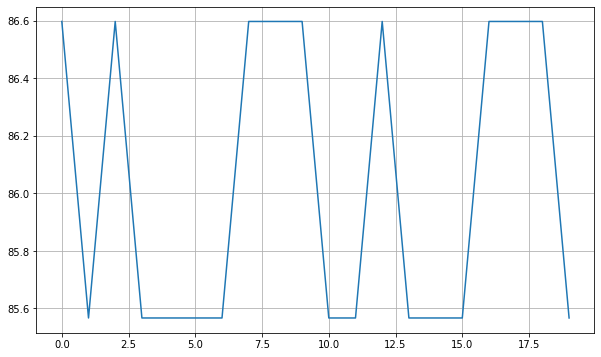

In [190]:
#Applying PCA Transformations

scores=[]
for i in range(20):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    #print('The shape of final transformed training feature set:')
    #print(Train_X_std_pca.shape)
    Train_X_std_pca = pd.DataFrame(Train_X_std_pca)

    Test_X_std_pca = pca.transform(Test_X_std)
    #print('\nThe shape of final transformed testing feature set:')
    #print(Test_X_std_pca.shape)
    Test_X_std_pca = pd.DataFrame(Test_X_std_pca)

    scores.append(recall_score(Test_Y,RandomForestClassifier().fit(Train_X_std_pca, Train_Y).predict(Test_X_std_pca))*100)

plt.plot(scores)
#plt.ylim([0.80,0.84])
plt.grid()
plt.show()

**Inference:** In VIF, RFE & PCA Techniques, we did notice any better scores upon dropping some multicollinear features. But in order to avoid the curse of dimensionality, we can capture top 90% of the data Variance explained by top 33 PCA components.

In [194]:
# Shortlisting Features

LR = LogisticRegression(solver='liblinear')
rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-15)   
rfe = rfe.fit(Train_X_std, Train_Y)

print('Shortlisting Features based on automated RFE Technique:')
print(Train_X_std.columns[rfe.support_].values)

Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
Test_X_std  = Test_X_std[Test_X_std.columns[rfe.support_]]

Shortlisting Features based on automated RFE Technique:
['V1' 'V2' 'V4' 'V5' 'V7' 'V8' 'V10' 'V11' 'V12' 'V13' 'V14' 'V16' 'V17'
 'V20' 'Amount']


---

## <center> 6. Predictive Modeling

In [195]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((7,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [196]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1]),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 96.8%
F1 Score = 91.0%

 Confusiton Matrix:
 [[398   0]
 [ 16  81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       398
           1       1.00      0.84      0.91        97

    accuracy                           0.97       495
   macro avg       0.98      0.92      0.95       495
weighted avg       0.97      0.97      0.97       495



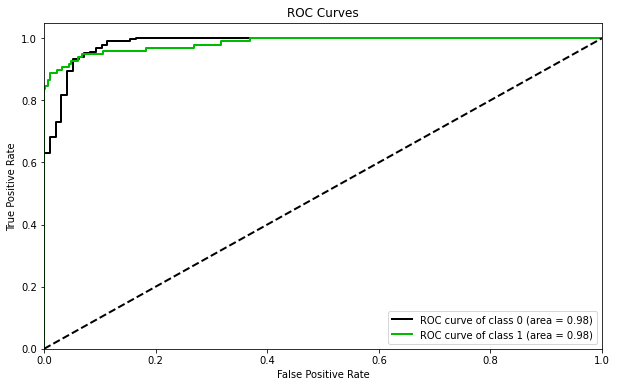


Interpreting the Output of Logistic Regression:

intercept  -1.7080903907178977
classes [0 1]


,coeff
V1,-0.123050
V2,0.280542
V4,0.956394
V5,0.208498
V7,-0.180114
V8,-0.245982
V10,-0.528124
V11,0.584897
V12,-0.722873
V13,-0.191367


In [197]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression(solver='liblinear')

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 97.2%
F1 Score = 92.4%

 Confusiton Matrix:
 [[396   2]
 [ 12  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       398
           1       0.98      0.88      0.92        97

    accuracy                           0.97       495
   macro avg       0.97      0.94      0.95       495
weighted avg       0.97      0.97      0.97       495



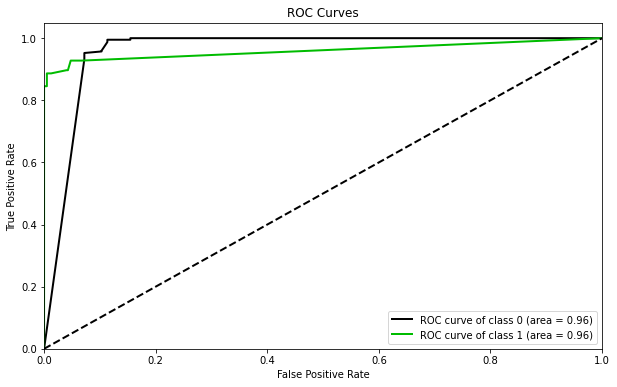


Interpreting the output of Decision Tree:



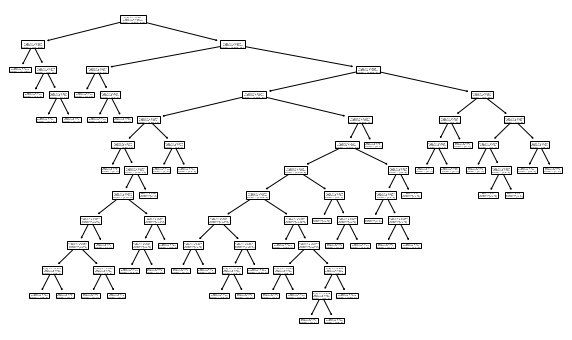

In [198]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 97.39999999999999%
F1 Score = 92.80000000000001%

 Confusiton Matrix:
 [[398   0]
 [ 13  84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       398
           1       1.00      0.87      0.93        97

    accuracy                           0.97       495
   macro avg       0.98      0.93      0.96       495
weighted avg       0.97      0.97      0.97       495



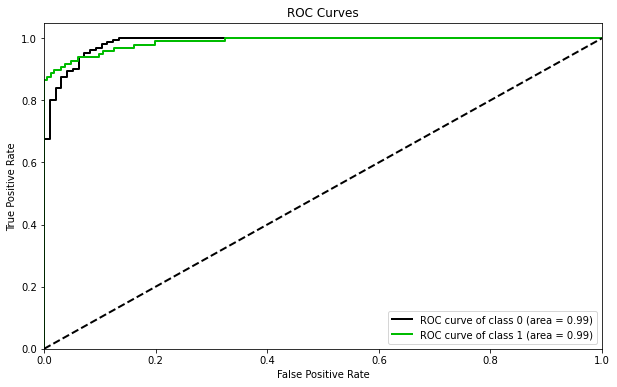


Interpreting the output of Random Forest:



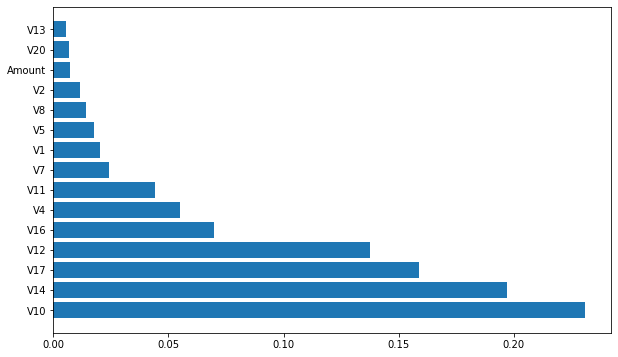

In [199]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 97.0%
F1 Score = 91.60000000000001%

 Confusiton Matrix:
 [[398   0]
 [ 15  82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       398
           1       1.00      0.85      0.92        97

    accuracy                           0.97       495
   macro avg       0.98      0.92      0.95       495
weighted avg       0.97      0.97      0.97       495



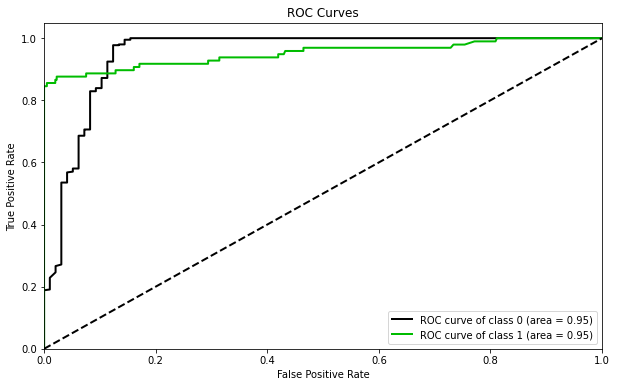

In [200]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 97.2%
F1 Score = 92.2%

 Confusiton Matrix:
 [[398   0]
 [ 14  83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       398
           1       1.00      0.86      0.92        97

    accuracy                           0.97       495
   macro avg       0.98      0.93      0.95       495
weighted avg       0.97      0.97      0.97       495



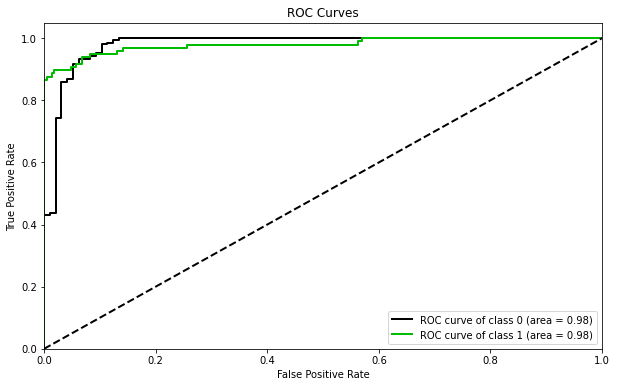

In [151]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 96.8%
F1 Score = 91.10000000000001%

 Confusiton Matrix:
 [[397   1]
 [ 15  82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       398
           1       0.99      0.85      0.91        97

    accuracy                           0.97       495
   macro avg       0.98      0.92      0.95       495
weighted avg       0.97      0.97      0.97       495



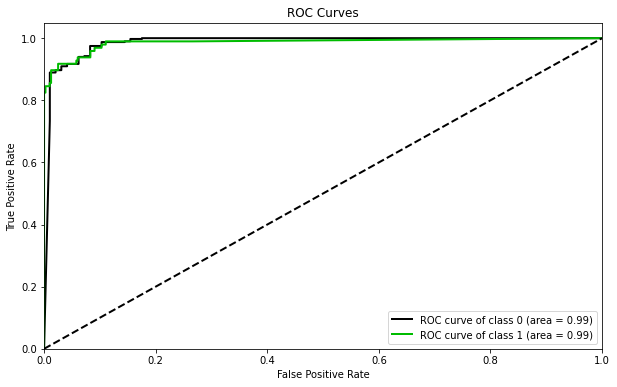

In [201]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 97.0%
F1 Score = 91.9%

 Confusiton Matrix:
 [[395   3]
 [ 12  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       398
           1       0.97      0.88      0.92        97

    accuracy                           0.97       495
   macro avg       0.97      0.93      0.95       495
weighted avg       0.97      0.97      0.97       495



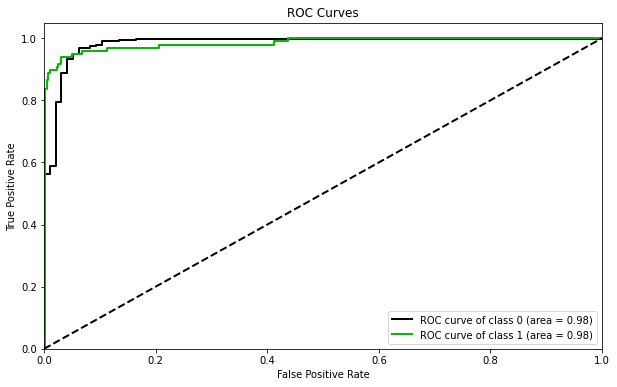

In [202]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier()#.fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 8. Extreme Gradient Boosting Classfier:

[23:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 97.6%
F1 Score = 93.4%

 Confusiton Matrix:
 [[398   0]
 [ 12  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       398
           1       1.00      0.88      0.93        97

    accuracy                           0.98       495
   macro avg       0.99      0.94      0.96       495
weighted avg       0.98      0.98      0.98       495



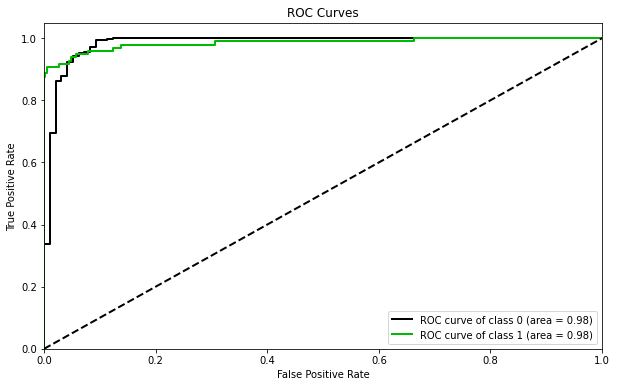

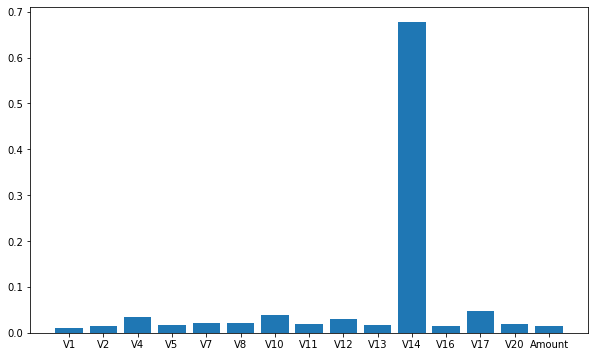

In [203]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y.values)#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

plt.bar( Train_X_std.columns,XGB.feature_importances_,)
plt.show()

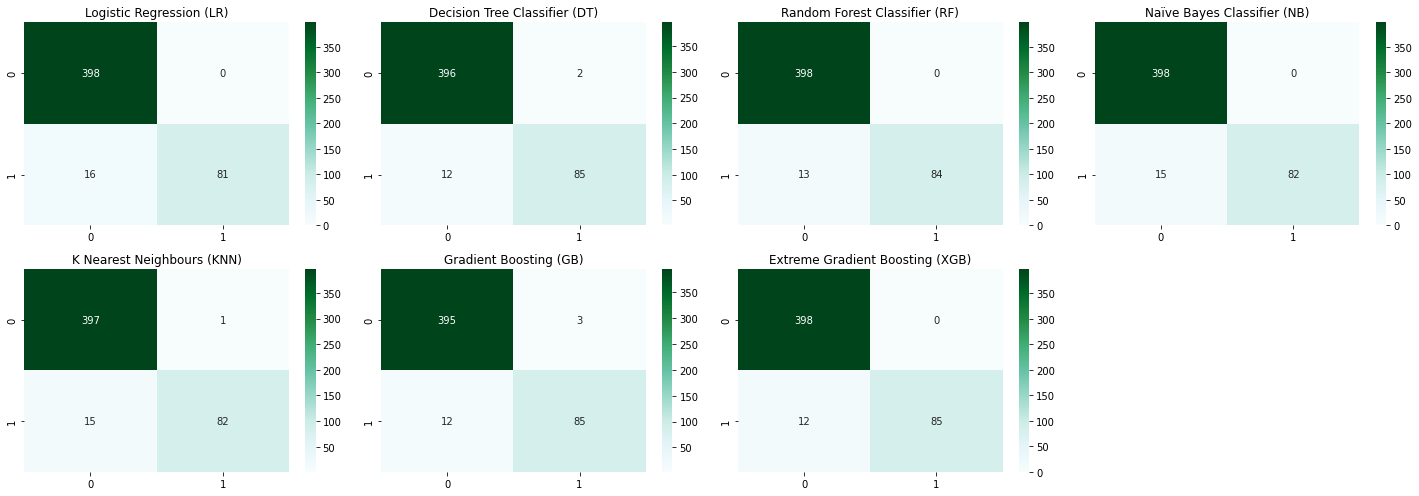

In [204]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=Tr/ue)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)/4)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,KNN,GB,XGB])

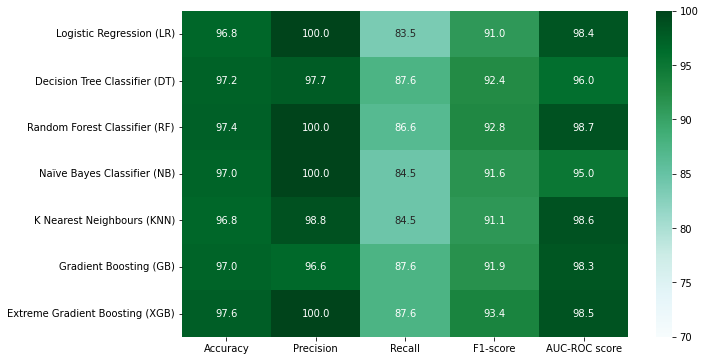

In [205]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=70, vmax=100, cmap='BuGn', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the Recall score. We can note from the above heatmap that the Boosting & Ensemble Models Performed the best on the current dataset...

---

## <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet large totalling around 28Lakh samples & after preprocessing 34.6% of the datasamples were dropped. 
- The samples were highly imbalanced after processing, hence SMOTE Technique was applied on the data to  balance the classes, adding 21.7% more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The Boosting & Random Forest Classifier performed exceptionally well on the current dataset, considering Recall Score as the key-metric.
- Yet it wise to also consider simpler model like Logistic Regression as it is more generalisable & is computationally less expensive, but comes at the cost of slight misclassifications.

In [ ]:
<<<----------------------------------------------------------THE END----------------------------------------------------------------->>>